# Milestone 1: Data Selection and EDA (Week 6)

### Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem.  
### Clearly identify the problem you will address and the target for your model.  

### Background: In US politics, a Campaign Management company oversees all aspects of a candidate’s political campaign, including campaign strategy, budget, staff hiring and training, fundraising, advertising, adherence to campaign finance laws, and liaising with various campaign team members. Campaign Management companies serve the candidate almost exclusively, where the Campaign Manager reports directly to the candidate and runs the campaign with the candidate’s missions, vision and values in mind.  

### Problem: CampaignMe is a US Campaign Management company that uses data to help get candidates into office. To run a successful campaign, avoid the problem of an unsuccessful campaign, and to ensure successful office election, CampaignMe will gather and analyze prior negative candidate history, including resignation history in past offices held. CampaignMe is looking to take on candidates with the highest probability of winning elections, and devise strategies to ensure that they will get elected.  

### Original Idea: To ensure a successful candidate campaign and election into office at any US government level, an analysis of each CampaignMe candidate's profile needs to be completed. In this specific analysis, CampaignMe will look at past US Congressional resignations. In some cases, resignation reasons are benign (e.g., being elected into a higher office), while others are more negative and illegal in nature (e.g., sexual harassment). A playbook for developing and executing a successful campaign will then be created and will be derived based off a created statistical model to help a potential candidate to get elected.

### Target for model: The model target is past candidate resigation reasons and their sentiments (positive/neutral or negative) 

### Dataset: The dataset used is a Congressional Resignation dataset of 615 members of Congress who resigned or were removed from office from March 4, 1901 (the first day of the 57th Congress) through January 15, 2018, including the resigning member’s party and district, the date they resigned, the reason for their resignation and the source of the information about their resignation. https://www.kaggle.com/yamqwe/congressional-resignationse. The dataset features are defined as follows:

$\bullet$ Member: The full name of the resigned Congress member<br>
$\bullet$ Party: The affiliated party of the resigned Congress member (D: Democrat, R: Republican) <br>
$\bullet$ District: The affiliated congressional district of the resigned Congress member <br>
$\bullet$ Congress: The affiliated United States Congress of the resigned Congress member <br>
$\bullet$ Resignation Date: The resignation date of the resigned Congress member <br>
$\bullet$ Reason: The text resignation reason why the Congress member resigned <br>
$\bullet$ Source: The source in which the Congress member resignation was published and found in<br>
$\bullet$ Category: The categorical resignation reason why the Congress member resigned <br>
X: Unwanted sexual contact <br>
A: Consensual sex scandals <br>
B	Other scandals <br>
C	Other office <br>
D	Private sector <br>
E	Health/family <br>
F	Other <br>
G	Left early <br>
H	Military service <br>
I	Election overturned<br>

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix
import yellowbrick
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Exploring the Data

In [2]:
# load the Congressional data into a dataframe
df = pd.read_csv('congressional_resignations.csv') 
df.head(5)

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH-12,115th,1/15/2018,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN-SEN,115th,1/2/2018,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ-08,115th,12/8/2017,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI-13,115th,12/5/2017,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA-18,115th,10/21/2017,Extramarital affair/abortion hypocrisy,POLITICO,A


In [3]:
#display the dimensions of the dataframe
df.shape

(615, 8)

In [4]:
#look at the column data types
df.dtypes

Member              object
Party               object
District            object
Congress            object
Resignation Date    object
Reason              object
Source              object
Category            object
dtype: object

### Observations
$\bullet$ The dataset has  615  rows and  8  columns <br>
$\bullet$ Some of the columns will not be useful for model building, e.g., 'Member', and 'Source' <br>
$\bullet$ All data is in object format, and Resignation Date will need to be converted to date/time format <br>
$\bullet$ The target of the model will be 'Reason':  0 means Positive or Neutral Resignation Reason, 1 means Negative Resignation Reason 

In [5]:
#get summary statistics of the numerical data
df.describe()

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
count,615,615,615,615,615,615,615,615
unique,598,2,369,59,524,267,116,21
top,Robert Secrest,D,CA-SEN,93rd,12/31/1974,Appointed federal judge,U.S. Congress,C
freq,3,357,7,42,33,60,335,357


In [6]:
#get summary statistics of the non-numerical data
df.describe(include = ['O'])

,Member,Party,District,Congress,Resignation Date,Reason,Source,Category
count,615,615,615,615,615,615,615,615
unique,598,2,369,59,524,267,116,21
top,Robert Secrest,D,CA-SEN,93rd,12/31/1974,Appointed federal judge,U.S. Congress,C
freq,3,357,7,42,33,60,335,357


In [7]:
#look for missing data in the training and test sets
print(df.isna().sum())

Member              0
Party               0
District            0
Congress            0
Resignation Date    0
Reason              0
Source              0
Category            0
dtype: int64


### Observations
$\bullet$ There's no missing data to deal with <br>
$\bullet$ Being appointment to be a federal judge is the most common reason for resignation in the 'Reason' and 'Category' column (category C is "Appointed federal judge) <br>
$\bullet$ The most common Party to be a part of while resignin is the Democratic Party <br>
$\bullet$ December 31, 1974 is the most common date to resign which is associated with the 93rd Congress (1973-1974)

## Visualizing the Data (Week 6, Milestone #1)

Text(0.5, 1.0, 'US Political Party Distribution')

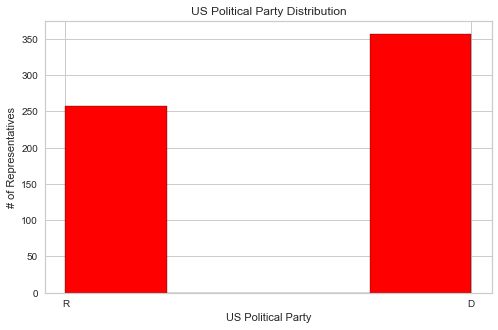

In [8]:
# Visualization 1: Histogram of US Political Party Affiliation
fig, ax = plt.subplots(figsize=(8, 5))
plt.hist(df['Party'], bins=4, color='red', edgecolor='black')
plt.xlabel('US Political Party')
plt.ylabel('# of Representatives')
plt.title('US Political Party Distribution')

Text(0.5, 1.0, 'US Representative Resigation Reason Distribution')

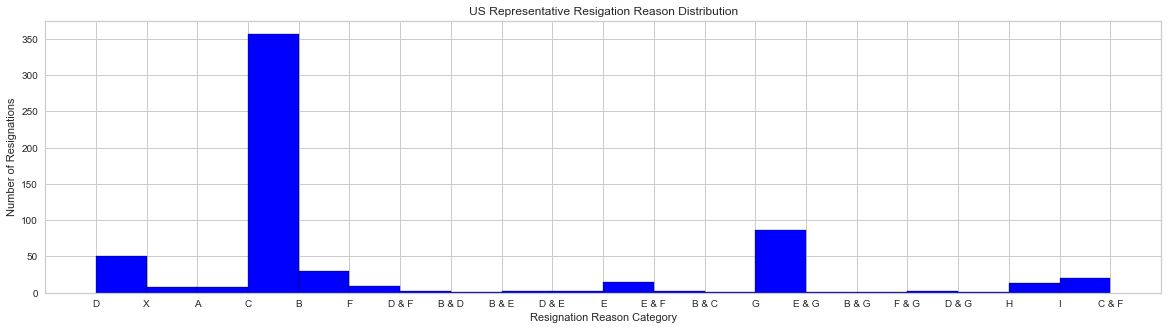

In [9]:
# Visualization 2: Bar graph of Resignation Reason Categories 
fig, ax = plt.subplots(figsize=(20, 5))
plt.hist(df['Category'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Resignation Reason Category' )
plt.ylabel('Number of Resignations')
plt.title('US Representative Resigation Reason Distribution') 

<Figure size 576x396 with 0 Axes>

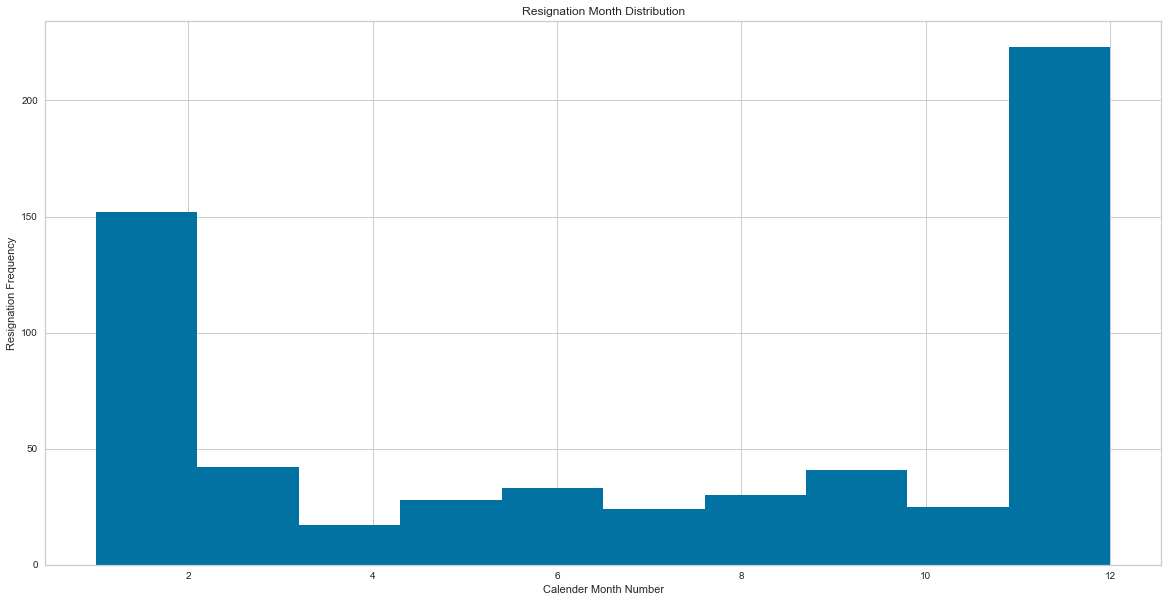

In [10]:
# Visualization 3: Resignation Data Histogram
df['Resignation Date'] = pd.to_datetime(df['Resignation Date'], infer_datetime_format=True)

plt.clf()
fig, ax = plt.subplots(figsize=(20, 10))
df['Resignation Date'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Calender Month Number')
plt.ylabel('Resignation Frequency')
plt.title('Resignation Month Distribution')
plt.show()

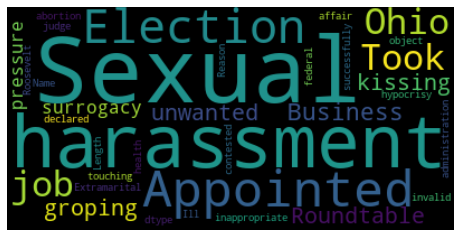

In [11]:
# Visualization 4: Word Cloud

# install and import wordcloud library
! pip install wordcloud
import wordcloud
# Create text variable from Reasons column
text = df["Reason"]
# Import word cloud to visualize and create wordcloud variable while converting the text variable to a string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud=WordCloud().generate(str(text))
# Visualize the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Observations
$\bullet$ Viz 1: Most of the senators in the Congressional resignation dataset are a part of the Democratic party (350 vs 250 Republicans) <br>
$\bullet$ Viz 2: The reason most likey to have resigned are as follows: 1. Appointed or Elected to a different role in Government (C), 2. Retired, lost reelection bid, appointment was expiring (G), 3. Took a role outside of government (D), 4. Ethics or curruption issues (B), 5. Their election was successfully contested and overturned (I) <br>
$\bullet$ Viz 3: Most of the Congressional resignations happen in either January or December <br>
$\bullet$ Viz 4: The bigger the words in the cloud, the more often they are seen in the dataframe column. So, in this case, Sexual, Appointed, Harrassment and Election are the most common words found in the Reason column. Although this Word Cloud is very useful, this is out of alignment with the findings from Visualization #2 (Ethics Issues including sexual harassment being the 4th most common instead of most common), so in subsequent analyses we will look specifically at the Reason column as target variable to understand this better

# Milestone 2: Preparing the Data for Modeling (Week 8)

## Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model building/evaluation phase.
## Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.¶
## Here is a list of steps to consider performing in Milestone 2

### Engineer new useful features

In [12]:
# Check the initial shape of the dataframe
df.shape

(615, 8)

In [13]:
# Add State column based on District column
df[['State', 'District']] = df['District'].str.split('-', 1, expand=True)

In [14]:
# Shift State column to 3rd position
third_column = df.pop('State')
# insert column using insert(position,column_name,third_column) function
df.insert(2, 'State', third_column)
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category
0,Pat Tiberi,R,OH,12,115th,2018-01-15,Took a job with the Ohio Business Roundtable,New York Times,D
1,Al Franken,D,MN,SEN,115th,2018-01-02,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X
2,Trent Franks,R,AZ,08,115th,2017-12-08,Sexual harassment/surrogacy pressure,CNN,X
3,John Conyers,D,MI,13,115th,2017-12-05,Sexual harassment/inappropriate touching,Washington Post,X
4,Tim Murphy,R,PA,18,115th,2017-10-21,Extramarital affair/abortion hypocrisy,POLITICO,A


In [15]:
# Recheck shape of dataframe to ensure new column has been added
df.shape

(615, 9)

In [16]:
# Add Secondary Category Column to house any secondary category reasons for resigning (e.g., some Category values are 2 reasons, like B & C)
df[['Category', 'Secondary Category']] = df['Category'].str.split(' &', 1, expand=True)
df.head(5)

,Member,Party,State,District,Congress,Resignation Date,Reason,Source,Category,Secondary Category
0,Pat Tiberi,R,OH,12,115th,2018-01-15,Took a job with the Ohio Business Roundtable,New York Times,D,None
1,Al Franken,D,MN,SEN,115th,2018-01-02,Sexual harassment/groping/unwanted kissing,Minneapolis Star Tribune,X,None
2,Trent Franks,R,AZ,08,115th,2017-12-08,Sexual harassment/surrogacy pressure,CNN,X,None
3,John Conyers,D,MI,13,115th,2017-12-05,Sexual harassment/inappropriate touching,Washington Post,X,None
4,Tim Murphy,R,PA,18,115th,2017-10-21,Extramarital affair/abortion hypocrisy,POLITICO,A,None


In [17]:
# Recheck shape of dataframe to ensure new column has been added
df.shape

(615, 10)

In [18]:
# Category column coding
# 'X': 'Unwanted sexual contact', 'A': 'Consensual sex scandals', 'B': 'Other scandals', 'C': 'Other Office', 
# 'D': 'Private Sector', 'E': 'Health or Family', 'F': 'Other', 'G': 'Left Early''H': 'Military Service', 'I': 'Election Overturned'

### Drop any features that are not useful for your model building and explain why they are not useful

In [19]:
# Drop the Member, Source and Resignation Date as these features are not required for a candidate playbook for a Congressional Campaign 
df = df.drop(['Member', 'Source', 'Resignation Date'], axis = 1)
df.head(5)

,Party,State,District,Congress,Reason,Category,Secondary Category
0,R,OH,12,115th,Took a job with the Ohio Business Roundtable,D,None
1,D,MN,SEN,115th,Sexual harassment/groping/unwanted kissing,X,None
2,R,AZ,08,115th,Sexual harassment/surrogacy pressure,X,None
3,D,MI,13,115th,Sexual harassment/inappropriate touching,X,None
4,R,PA,18,115th,Extramarital affair/abortion hypocrisy,A,None


In [20]:
# Recheck shape of dataframe to ensure new column has been removed
df.shape

(615, 7)

### Observations
$\bullet$ Member, Resignation Date and Source features are not useful in this model building because when creating a playbook for future elections, the Congress Member's name will not be important to analyze. Also, the source where the resignation is published will also not be important to create the playbook. Resignation Date is included in the Congress column with a margin (2 year period). For this analysis, we are specifically looking for reasons of the resignation and features related directly to the Congress Member (Party, State, District, Congress, Resignation Date) that could be applied to future candidates. <br>

### Transform features if necessary

In [21]:
#look at the column data types
df.dtypes

Party                 object
State                 object
District              object
Congress              object
Reason                object
Category              object
Secondary Category    object
dtype: object

In [22]:
# Reason Column: Convert all / forward slashes to a space
df['Reason'] = df['Reason'].str.replace('/', ' ')
df.head(5)

,Party,State,District,Congress,Reason,Category,Secondary Category
0,R,OH,12,115th,Took a job with the Ohio Business Roundtable,D,None
1,D,MN,SEN,115th,Sexual harassment groping unwanted kissing,X,None
2,R,AZ,08,115th,Sexual harassment surrogacy pressure,X,None
3,D,MI,13,115th,Sexual harassment inappropriate touching,X,None
4,R,PA,18,115th,Extramarital affair abortion hypocrisy,A,None


In [23]:
# Reason Column: Convert all text to lowercase
df['Reason'] = df['Reason'].str.lower() # use str.lower to convert all text to lowercase letters
# Reason Column: Remove punctuation and special characters
df['Reason'] = df['Reason'].str.replace(r'[^\w\s]+', '') # use str.replace to remove all the special characters
df.head(5)

<ipython-input-23-a9dd3779387b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reason'] = df['Reason'].str.replace(r'[^\w\s]+', '') # use str.replace to remove all the special characters


,Party,State,District,Congress,Reason,Category,Secondary Category
0,R,OH,12,115th,took a job with the ohio business roundtable,D,None
1,D,MN,SEN,115th,sexual harassment groping unwanted kissing,X,None
2,R,AZ,08,115th,sexual harassment surrogacy pressure,X,None
3,D,MI,13,115th,sexual harassment inappropriate touching,X,None
4,R,PA,18,115th,extramarital affair abortion hypocrisy,A,None


In [24]:
# Reason Column: Remove stop words
# Import library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Import stopwords with nltk
stop = stopwords.words('english')
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Reason'] = df['Reason'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Party,State,District,Congress,Reason,Category,Secondary Category
0,R,OH,12,115th,took job ohio business roundtable,D,None
1,D,MN,SEN,115th,sexual harassment groping unwanted kissing,X,None
2,R,AZ,08,115th,sexual harassment surrogacy pressure,X,None
3,D,MI,13,115th,sexual harassment inappropriate touching,X,None
4,R,PA,18,115th,extramarital affair abortion hypocrisy,A,None


In [25]:
# create porter_stemmer variable
porter_stemmer = PorterStemmer() 

In [26]:
# Tokenize the sentences
df['Reason_tokenized']=df['Reason'].apply(lambda x : filter(None,x.split(" ")))

In [27]:
# Apply stemmer to the above tokenized column as follows
df['Reason_stemmed']=df['Reason_tokenized'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [28]:
# Go back to review in sentence format
df['Reason_stemmed_sentence']=df['Reason_stemmed'].apply(lambda x : " ".join(x))
df.head(5)

,Party,State,District,Congress,Reason,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence
0,R,OH,12,115th,took job ohio business roundtable,D,None,<filter object at 0x000001C48DC52A60>,"[took, job, ohio, busi, roundtabl]",took job ohio busi roundtabl
1,D,MN,SEN,115th,sexual harassment groping unwanted kissing,X,None,<filter object at 0x000001C48DC527C0>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss
2,R,AZ,08,115th,sexual harassment surrogacy pressure,X,None,<filter object at 0x000001C48DC529A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur
3,D,MI,13,115th,sexual harassment inappropriate touching,X,None,<filter object at 0x000001C48DC52B20>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch
4,R,PA,18,115th,extramarital affair abortion hypocrisy,A,None,<filter object at 0x000001C48DC52D90>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi


In [29]:
# add a Reason Sentiment column (0 is a positive or neutral registation reason/successful candidate, and 1 is  negative registation reason/unsuccessful candidate)
# import TextBlob
from textblob import TextBlob
# Classify each reason as positive or negative
df[['polarity', 'subjectivity']] = df['Reason'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df.head(5)

,Party,State,District,Congress,Reason,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity
0,R,OH,12,115th,took job ohio business roundtable,D,None,<filter object at 0x000001C48DC52A60>,"[took, job, ohio, busi, roundtabl]",took job ohio busi roundtabl,0.0,0.000000
1,D,MN,SEN,115th,sexual harassment groping unwanted kissing,X,None,<filter object at 0x000001C48DC527C0>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333
2,R,AZ,08,115th,sexual harassment surrogacy pressure,X,None,<filter object at 0x000001C48DC529A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333
3,D,MI,13,115th,sexual harassment inappropriate touching,X,None,<filter object at 0x000001C48DC52B20>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667
4,R,PA,18,115th,extramarital affair abortion hypocrisy,A,None,<filter object at 0x000001C48DC52D90>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000


In [30]:
# Create Reason_score column based on the polarity column
df['Reason_score'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0) # 0 is a neutral/positive sentiment, and 1 is a negative sentiment of the Reason column
df.head(5)

,Party,State,District,Congress,Reason,Category,Secondary Category,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity,Reason_score
0,R,OH,12,115th,took job ohio business roundtable,D,None,<filter object at 0x000001C48DC52A60>,"[took, job, ohio, busi, roundtabl]",took job ohio busi roundtabl,0.0,0.000000,0
1,D,MN,SEN,115th,sexual harassment groping unwanted kissing,X,None,<filter object at 0x000001C48DC527C0>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333,1
2,R,AZ,08,115th,sexual harassment surrogacy pressure,X,None,<filter object at 0x000001C48DC529A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333,1
3,D,MI,13,115th,sexual harassment inappropriate touching,X,None,<filter object at 0x000001C48DC52B20>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667,1
4,R,PA,18,115th,extramarital affair abortion hypocrisy,A,None,<filter object at 0x000001C48DC52D90>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000,0


In [31]:
# look at column type of each column
df.dtypes

Party                       object
State                       object
District                    object
Congress                    object
Reason                      object
Category                    object
Secondary Category          object
Reason_tokenized            object
Reason_stemmed              object
Reason_stemmed_sentence     object
polarity                   float64
subjectivity               float64
Reason_score                 int64
dtype: object

### Deal with missing data (do not just drop rows or columns without justifying this)

In [32]:
#look for missing data in the training and test sets
print(df.isna().sum())

# The Secondary Category column has missing data as the majorty (598/615) of the Category column only have 1 resigation reason category. These missing values will not cause issues in the modeling, so they will remain as-is.

Party                        0
State                        0
District                     0
Congress                     0
Reason                       0
Category                     0
Secondary Category         598
Reason_tokenized             0
Reason_stemmed               0
Reason_stemmed_sentence      0
polarity                     0
subjectivity                 0
Reason_score                 0
dtype: int64


### Create dummy variables if necessary

In [33]:
# Create dummy variables for the origin column
df = pd.concat([df.drop(['Party','State', 'District', 'Congress','Category','Secondary Category'], axis=1), pd.get_dummies(df[['Party','State', 'District', 'Congress','Category','Secondary Category']])], axis=1)
df.head(5)

,Reason,Reason_tokenized,Reason_stemmed,Reason_stemmed_sentence,polarity,subjectivity,Reason_score,Party_D,Party_R,State_ FL,...,Category_F,Category_G,Category_H,Category_I,Category_X,Secondary Category_ C,Secondary Category_ D,Secondary Category_ E,Secondary Category_ F,Secondary Category_ G
0,took job ohio business roundtable,<filter object at 0x000001C48DC52A60>,"[took, job, ohio, busi, roundtabl]",took job ohio busi roundtabl,0.0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,sexual harassment groping unwanted kissing,<filter object at 0x000001C48DC527C0>,"[sexual, harass, grope, unwant, kiss]",sexual harass grope unwant kiss,0.5,0.833333,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,sexual harassment surrogacy pressure,<filter object at 0x000001C48DC529A0>,"[sexual, harass, surrogaci, pressur]",sexual harass surrogaci pressur,0.5,0.833333,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,sexual harassment inappropriate touching,<filter object at 0x000001C48DC52B20>,"[sexual, harass, inappropri, touch]",sexual harass inappropri touch,0.5,0.666667,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,extramarital affair abortion hypocrisy,<filter object at 0x000001C48DC52D90>,"[extramarit, affair, abort, hypocrisi]",extramarit affair abort hypocrisi,0.0,0.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Check all column names in the dataframe
for col_name in df.columns: 
    print(col_name)

Reason
Reason_tokenized
Reason_stemmed
Reason_stemmed_sentence
polarity
subjectivity
Reason_score
Party_D
Party_R
State_ FL
State_AK
State_AL
State_AR
State_AZ
State_CA
State_CO
State_CT
State_DE
State_FL
State_GA
State_HI
State_IA
State_ID
State_IL
State_IN
State_KS
State_KY
State_LA
State_MA
State_MD
State_ME
State_MI
State_MN
State_MO
State_MS
State_MT
State_NC
State_ND
State_NE
State_NH
State_NJ
State_NM
State_NV
State_NY
State_OH
State_OK
State_OR
State_PA
State_RI
State_SC
State_SD
State_TN
State_TX
State_UT
State_VA
State_VT
State_WA
State_WI
State_WV
State_WY
District_01
District_02
District_03
District_04
District_05
District_06
District_07
District_08
District_09
District_10
District_11
District_12
District_13
District_14
District_15
District_16
District_17
District_18
District_19
District_20
District_21
District_22
District_23
District_24
District_25
District_26
District_27
District_28
District_29
District_30
District_32
District_33
District_34
District_36
District_37
Distri

In [35]:
# Recheck shape of dataframe to ensure new column has been removed
df.shape

(615, 179)

In [36]:
# Split the data into a training and test set, drop all columns related to Reason at that is the target
X = df.drop(['Reason_score', 'Reason','Reason_tokenized', 'Reason_stemmed', 'Reason_stemmed_sentence', 'polarity', 'subjectivity'], axis = 1)
# Get the target (Reason_score)
y = df['Reason_score'] 
#split the data into training and test sets
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
# Reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [38]:
# show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many Positive/Neutral and Negative Resignation Reasons are in training and test sets
# 0 is a neutral/positive sentiment, and 1 is a negative sentiment of the Reason column
print(y_train.value_counts())
print(y_test.value_counts())
#view the training features
X_train.head()

(492, 172)
(123, 172)
0    359
1    133
Name: Reason_score, dtype: int64
0    95
1    28
Name: Reason_score, dtype: int64


,Party_D,Party_R,State_ FL,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,...,Category_F,Category_G,Category_H,Category_I,Category_X,Secondary Category_ C,Secondary Category_ D,Secondary Category_ E,Secondary Category_ F,Secondary Category_ G
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

Party_D                  0
Party_R                  0
State_ FL                0
State_AK                 0
State_AL                 0
                        ..
Secondary Category_ C    0
Secondary Category_ D    0
Secondary Category_ E    0
Secondary Category_ F    0
Secondary Category_ G    0
Length: 172, dtype: int64
Party_D                  0
Party_R                  0
State_ FL                0
State_AK                 0
State_AL                 0
                        ..
Secondary Category_ C    0
Secondary Category_ D    0
Secondary Category_ E    0
Secondary Category_ F    0
Secondary Category_ G    0
Length: 172, dtype: int64


### Summary of Data Preparation Steps

$\bullet$ Dropped unnecessary data <br>
$\bullet$ Created dummy variables for the categorical data <br>
$\bullet$ Split data into training and test sets